# Generation of Jump-Diffusion

In [1]:
#(C) Roman Makarov 2018
#Wilfrid Laurier University

In [2]:
#Functions and Libraries
import math
from scipy import stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
npr.seed(2016)

In [4]:
def BrownianPath(T,M):
    Z = npr.standard_normal(M)
    sqdt = math.sqrt(T / M)
    BP = np.zeros(M+1)
    BP[1:] = np.cumsum(Z) * sqdt
    return BP

In [5]:
T = 1.0
M = 500
B = BrownianPath(T,M)

In [6]:
times = np.linspace(0,T,M+1)

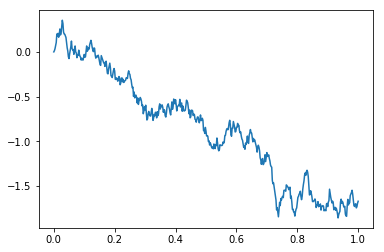

In [7]:
plt.plot(times,B)

In [8]:
def GeometricBrownianPath(S0,mu,sig,T,M):
    B = BrownianPath(T,M)
    dt = T / M
    GBMP = S0 * np.exp( mu * dt * np.asarray(range(0,M+1)) + sig * B)
    return GBMP

In [9]:
S0 = 100
mu = 0.1
sig = 0.3
GB = GeometricBrownianPath(S0,mu,sig,T,M)

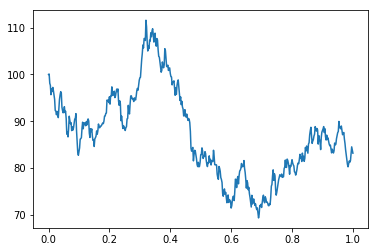

In [10]:
plt.plot(times,GB)

In [11]:
def MertonPath(S0,mu,sig,lamJ,alphaJ,betaJ,T,M):
    B = BrownianPath(T,M)
    dt = T / M
    Pois = npr.poisson(lamJ*dt,M)
    Z = npr.standard_normal(M)
    CPC = np.zeros(M+1)
    CPC[1:] = np.cumsum(Pois*alphaJ + np.sqrt(Pois)*betaJ*Z)
    GBMP = S0 * np.exp( mu * dt * np.asarray(range(0,M+1)) + sig * B + CPC)
    return GBMP

In [12]:
lamJ = 10
alphaJ = -0.1
betaJ = 0.5
MP = MertonPath(S0,mu,sig,lamJ,alphaJ,betaJ,T,M)

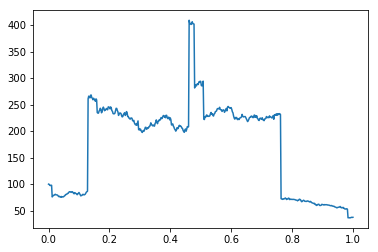

In [13]:
plt.plot(times,MP)

In [14]:
def MertonLogPath(mu,sig,lamJ,muJ,sigJ,MaT,N):
    dt = MaT / N
    sdt = np.sqrt(dt)
    X = np.zeros(N+1)
    SNB = npr.standard_normal(N)
    SNJ = npr.standard_normal(N)
    PJ = npr.poisson(lamJ*dt,N)
    for t in range(0,N):
        BrownComp = mu * dt + sig * sdt * SNB[t] 
        JumpComp = muJ * PJ[t] + sigJ * np.sqrt(PJ[t]) * SNJ[t] 
        X[t+1] = X[t] + BrownComp + JumpComp
    return X

In [15]:
p = MertonLogPath(0.05,0.1,2,-0.1,0.2,4.0,500)
t = np.linspace(0,4,501)

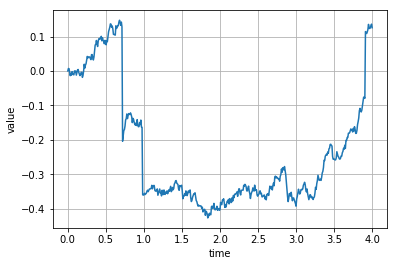

In [16]:
plt. plot(t,p, lw=1.5)
plt.xlabel('time')
plt.ylabel('value')
plt.grid(True)

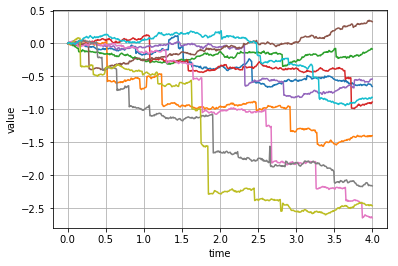

In [17]:
p = []
t = np.linspace(0,4,501)
for i in range(10):
    p.append(MertonLogPath(0.05,0.1,2,-0.1,0.2,4.0,500))
    plt.plot(t,p[-1])
plt.xlabel('time')
plt.ylabel('value')
plt.grid(True)